# Layered surfaces in 2D

In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import skimage.io 
import slgbuilder

## On surface cost example

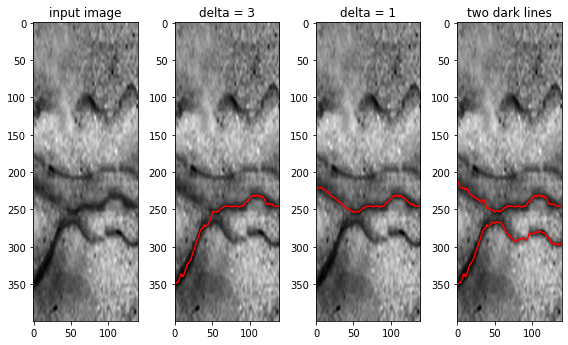

In [10]:
I = skimage.io.imread(os.path.join('data', 'layers_A.png')).astype(np.int32)

fig, ax = plt.subplots(1,4, figsize=(8,10))
ax[0].imshow(I, cmap='gray')
ax[0].set_title('input image')

#%% one line not very smooth
delta = 3

layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

ax[1].imshow(I, cmap='gray')
ax[1].plot(segmentation_line, 'r')
ax[1].set_title(f'delta = {delta}')


#%% a single smoother line
delta = 1

layer = slgbuilder.GraphObject(I)
helper = slgbuilder.MaxflowBuilder()
helper.add_object(layer)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)

helper.solve()
segmentation = helper.what_segments(layer)
segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1

ax[2].imshow(I, cmap='gray')
ax[2].plot(segmentation_line, 'r')
ax[2].set_title(f'delta = {delta}')


#%% two lines
layers = [slgbuilder.GraphObject(I), slgbuilder.GraphObject(I)]
delta = 3

helper = slgbuilder.MaxflowBuilder()
helper.add_objects(layers)
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=delta, wrap=False)  
helper.add_layered_containment(layers[0], layers[1], min_margin=15)

helper.solve()
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [s.shape[0] - np.argmax(s[::-1,:], axis=0) - 1 for s in segmentations]

ax[3].imshow(I, cmap='gray')
for line in segmentation_lines:
    ax[3].plot(line, 'r')
ax[3].set_title('two dark lines')
plt.tight_layout()
plt.show()

## In region cost example

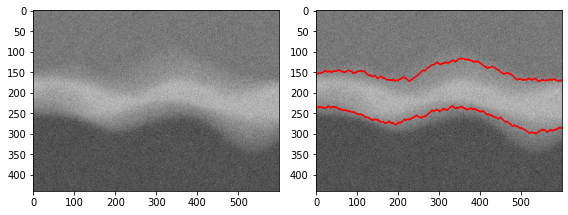

In [12]:
I = skimage.io.imread(os.path.join('data', 'peaks_image.png')).astype(np.int32)

fig, ax = plt.subplots(1,2, figsize=(8,10))
ax[0].imshow(I, cmap='gray')


layers = [slgbuilder.GraphObject(0*I), slgbuilder.GraphObject(0*I)] # no on-surface cost
helper = slgbuilder.MaxflowBuilder()
helper.add_objects(layers)

# Addin regional costs, 
# the region in the middle is bright compared to two darker regions.
helper.add_layered_region_cost(layers[0], I, 255-I)
helper.add_layered_region_cost(layers[1], 255-I, I)

# Adding geometric constrains
helper.add_layered_boundary_cost()
helper.add_layered_smoothness(delta=1, wrap=False)  
helper.add_layered_containment(layers[0], layers[1], min_margin=1)

# Cut
helper.solve()
segmentations = [helper.what_segments(l).astype(np.int32) for l in layers]
segmentation_lines = [s.shape[0] - np.argmax(s[::-1,:], axis=0) - 1 for s in segmentations]

# Visualization
ax[1].imshow(I, cmap='gray')
for line in segmentation_lines:
    ax[1].plot(line, 'r')

plt.tight_layout()
plt.show()

## Rammed Earth Layers Limestone